### Проектная работа
* Темы:
    1. Описательная статистика (статистические характеристики, графики, взаимосвязь величин, дисперсионный и факторный анализ)
    2. Предиктивная аналитика (линейная регрессия, логистическая регрессия)

#### Работа: Оценка зависимости бизнес-результата от своевременности работы с задачами 
Контекст: сотрудники получают задачи с потенциальными сделками. После получения задачи в течение заданного времени сотрудник должен сформировать подзадачи, соответствующие сделкам. Подзадачи должны перейти в статус заключенных или несостоявшихся сделок. Есть признак того, что заданное время было просрочено. Гипотеза – если сотрудник берёт задачи в работу и формирует подзадачи в срок, то его доля заключенных сделок выше.
Признак: доля задач, взятых в работу в срок. Переменная: доля заключенных сделок. Возможно, стоит проверить на зависимость от количества потенциальных сделок - на случай, если «хорошим» сотрудникам поступает больше сделок в работу.
Цель работы – проверить, влияет ли дисциплина (своевременное взятие задач в работу) на результат.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

##### Загрузка и обработка обезличенного датасета 

In [45]:
df = pd.read_excel("project_dataset.xlsx", sheet_name="Export Worksheet")
df.head()

,ID,BEGIN_DT,END_DT,CREATE_DT,FIRST_ISSUE_CREATE_DT,FIRST_CLOSE_DT,ISSUE_STAGE_NAME,EXPIRED,TB_NAME_ISU,USER_ID,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK
0,25923,21.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,720030,1,0,1,0
1,25722,21.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,3194418,1,0,1,0
2,25787,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,3194418,1,0,1,0
3,25650,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,1266400,1,0,1,0
4,25849,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,1848864,1,0,1,0


In [46]:
def df_info(input_dataframe):
    ''' Определение формы датафрейма. 
    '''
    print(input_dataframe.info())
    return print("Форма: {}\n\nСтолбцы: {}\n\nИндексы: {}\n".format(input_dataframe.shape, 
                                                                      input_dataframe.columns, input_dataframe.index))

df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 14 columns):
ID                       5408 non-null int64
BEGIN_DT                 5408 non-null object
END_DT                   5408 non-null object
CREATE_DT                5408 non-null object
FIRST_ISSUE_CREATE_DT    3003 non-null object
FIRST_CLOSE_DT           49 non-null object
ISSUE_STAGE_NAME         5408 non-null object
EXPIRED                  5408 non-null object
TB_NAME_ISU              5408 non-null object
USER_ID                  5408 non-null int64
COUNT_SUB_ISSUE          5408 non-null int64
COUNT_DEAL               5408 non-null int64
EXPIRED_MARK             5408 non-null int64
CANCEL_ACCEPT_MARK       5408 non-null int64
dtypes: int64(6), object(8)
memory usage: 591.6+ KB
None
Форма: (5408, 14)

Столбцы: Index(['ID', 'BEGIN_DT', 'END_DT', 'CREATE_DT', 'FIRST_ISSUE_CREATE_DT',
       'FIRST_CLOSE_DT', 'ISSUE_STAGE_NAME', 'EXPIRED', 'TB_NAME_ISU',
       'USER_ID', 'COUNT_SUB

In [47]:
print(df["EXPIRED"].value_counts(), "\n")
print(df["TB_NAME_ISU"].value_counts(), "\n")
print(df["ISSUE_STAGE_NAME"].value_counts(), "\n")
print(df["FIRST_CLOSE_DT"].value_counts(), "\n")

Отказ            2570
Просрочено       1614
Закрыта          1223
Не просрочено       1
Name: EXPIRED, dtype: int64 

Волго-Вятский банк             833
Среднерусский банк             653
Северо-Западный банк           554
Центрально-Черноземный банк    542
Поволжский банк                483
Юго-Западный банк              478
Уральский банк                 459
Сибирский банк                 414
Байкальский банк               386
Московский банк                309
Дальневосточный банк           297
Name: TB_NAME_ISU, dtype: int64 

Отказ        2570
В работе     1360
Закрыта      1223
Загружена     255
Name: ISSUE_STAGE_NAME, dtype: int64 

30.07.19    45
31.07.19     2
29.07.19     2
Name: FIRST_CLOSE_DT, dtype: int64 



In [55]:
df.loc[df['FIRST_CLOSE_DT'].notnull()]

,ID,BEGIN_DT,END_DT,CREATE_DT,FIRST_ISSUE_CREATE_DT,FIRST_CLOSE_DT,ISSUE_STAGE_NAME,EXPIRED,TB_NAME_ISU,USER_ID,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK
2623,17200,30.07.19,06.08.19,23.07.19,30.07.19,30.07.19,Отказ,Отказ,Дальневосточный банк,3084406,1,0,0,0
2630,18172,30.07.19,13.08.19,30.07.19,NaN,30.07.19,Отказ,Отказ,Северо-Западный банк,1379838,0,0,0,1
2631,18173,30.07.19,13.08.19,30.07.19,NaN,30.07.19,Отказ,Отказ,Северо-Западный банк,1379838,0,0,0,1
2669,18214,30.07.19,13.08.19,30.07.19,NaN,30.07.19,Отказ,Отказ,Северо-Западный банк,1379838,0,0,0,1
2686,16829,29.07.19,12.08.19,19.07.19,NaN,30.07.19,Отказ,Отказ,Байкальский банк,250106,0,0,0,1
2692,17058,29.07.19,12.08.19,19.07.19,26.07.19,31.07.19,Отказ,Отказ,Байкальский банк,2205710,2,0,0,0
2717,17863,29.07.19,03.08.19,26.07.19,NaN,30.07.19,Отказ,Отказ,Дальневосточный банк,3084406,0,0,0,1
2718,17864,29.07.19,03.08.19,26.07.19,30.07.19,30.07.19,Отказ,Отказ,Дальневосточный банк,3084406,1,0,0,0
2725,17893,29.07.19,03.08.19,26.07.19,29.07.19,30.07.19,Отказ,Отказ,Поволжский банк,910566,1,0,0,0
2752,17934,29.07.19,03.08.19,26.07.19,30.07.19,30.07.19,Отказ,Отказ,Дальневосточный банк,3084406,1,0,0,0


In [59]:
"ISSUE_STAGE_NAME","EXPIRED","TB_NAME_ISU"

('ISSUE_STAGE_NAME', 'EXPIRED', 'TB_NAME_ISU')

In [67]:
df1 = df.groupby("USER_ID")['COUNT_SUB_ISSUE',"COUNT_DEAL","EXPIRED_MARK","CANCEL_ACCEPT_MARK"].sum()
df1
# добваить кол-во задач-строк

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK
USER_ID,,,,
213380,59,25,7,19
236084,15,3,1,0
249998,15,0,2,16
250106,32,1,7,21
256624,46,7,9,2
541000,58,16,19,14
609180,16,2,4,14
614176,4,1,1,14
614532,16,5,4,7


In [69]:
# db1["IN_TIME"] = кол-во задач-строк / (кол-во задач-строк - db1["EXPIRED_MARK"])
#db1["EXPIRED_RATIO"] =  db1["EXPIRED_MARK"] / кол-во задач-строк


df1["DEAL_RATIO"] = df1["COUNT_DEAL"] / df1["COUNT_SUB_ISSUE"]

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,DEAL_RATIO
USER_ID,,,,,
213380,59,25,7,19,0.423729
236084,15,3,1,0,0.200000
249998,15,0,2,16,0.000000
250106,32,1,7,21,0.031250
256624,46,7,9,2,0.152174
541000,58,16,19,14,0.275862
609180,16,2,4,14,0.125000
614176,4,1,1,14,0.250000
614532,16,5,4,7,0.312500


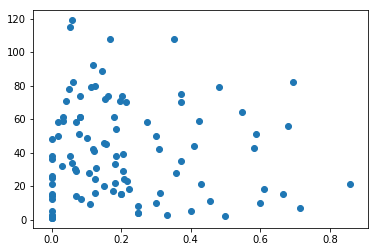

In [73]:
plt.scatter(df1["DEAL_RATIO"],df1["COUNT_SUB_ISSUE"])

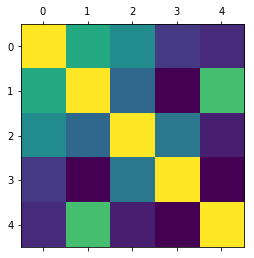

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,DEAL_RATIO
COUNT_SUB_ISSUE,1,0.538549,0.393604,0.0189606,-0.0369973
COUNT_DEAL,0.538549,1,0.216275,-0.174095,0.65362
EXPIRED_MARK,0.393604,0.216275,1,0.288604,-0.0783041
CANCEL_ACCEPT_MARK,0.0189606,-0.174095,0.288604,1,-0.175473
DEAL_RATIO,-0.0369973,0.65362,-0.0783041,-0.175473,1


In [75]:
X_corr = db1.corr()
plt.matshow(X_corr)
plt.show()
X_corr.style.background_gradient(cmap='coolwarm')